# Data Understanding
This notebook use diamonds dataset in order to demonstrate and exercise common data understanding tasks.
The notbook includes:
* [Diamonds dataset description](#dataset_description)
* [Data loading and metadata extraction](#data_loading)
* [Basic descriptive statistics](#basic_descriptive_statistics)
* [Statistical measures](#statistical_measures)
    * [Entropy](#entropy)
    * [Mutual Information](#mutual_information)
    * [Correlation](#correlation)
* [Data visualization](#data_visualization)

---

In [1]:
from IPython.display import HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn import metrics
import itertools

## <a name="dataset_description"></a>BlackJack Dataset Description:

The data was generated from the code used to analyse a million hands of Blackjack. The cards are distributed as seen in a casino. Idea is find out patterns and find out a strategy to optimize wins. The different columns are cards distributed to players and dealer and their sum of cards and how that round was won, either by player or by the dealer.

A BlackJack hand is described by the following properties:
* Index
* PlayerNoIdentifies each player - There are 6 of them playing each round.
* card1 - First card dealt to the player.
* card2 - Second card dealt to the player.
* card3 - Third card dealt to the player. (If needed else 0)
* card4 - Fourth card dealt to the player. (If needed else 0)
* card5 - Fifth card dealt to the player. (If needed else 0)
* sumofcards - Sum of all cards of player
* dealcard1 - First card dealt to the Dealer.
* dealcard2 - Second card dealt to the Dealer.
* dealcard3 - Third card dealt to the Dealer. (If needed else 0)
* dealcard4 - Fourth card dealt to the Dealer. (If needed else 0)
* dealcard5 -Fifth card dealt to the Dealer. (If needed else 0)
* sumofdeal - Sum of all cards of Dealer
* blkjck - If the Player hits a Blackjack
* winloss - Player WIn or Loss
* plybustbeat - If Player loses, was he Beat or did he Bust
* dlbustbeat - If Dealer loses, was he Beat or did he Bust
* plwinamt - Total amount won by Player (each round)
* dlwinamt - Total amount won by Dealer (each round)
* ply2cardsum - Sum of first 2 cards dealt to a player

## <a name="data_loading"></a>Data Loading

Read csv file into pandas dataframe. present few rows with the "head" function.

In [2]:
hands = pd.read_csv('data/blkjckhands.csv')
hands = hands.drop(['Unnamed: 0'], axis=1)
hands.head(15)

,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,Player1,7,10,0,0,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,Player2,10,9,0,0,0,19,10,8,0,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,Player3,9,8,0,0,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,Player4,2,10,0,5,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,Player5,10,2,0,5,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
5,Player6,6,1,8,10,0,25,10,8,0,0,0,18,nowin,Loss,Bust,PlBust,0,10,7
6,Player1,10,4,0,0,0,14,4,4,5,10,0,23,nowin,Win,DlBust,Bust,20,0,14
7,Player2,3,10,0,0,0,13,4,4,5,10,0,23,nowin,Win,DlBust,Bust,20,0,13
8,Player3,10,2,0,0,0,12,4,4,5,10,0,23,nowin,Win,DlBust,Bust,20,0,12
9,Player4,9,6,0,0,0,15,4,4,5,10,0,23,nowin,Win,DlBust,Bust,20,0,15


BlackJack info will describe each field and the general pandas object that we use.

In [3]:
hands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 20 columns):
PlayerNo       900000 non-null object
card1          900000 non-null int64
card2          900000 non-null int64
card3          900000 non-null int64
card4          900000 non-null int64
card5          900000 non-null int64
sumofcards     900000 non-null int64
dealcard1      900000 non-null int64
dealcard2      900000 non-null int64
dealcard3      900000 non-null int64
dealcard4      900000 non-null int64
dealcard5      900000 non-null int64
sumofdeal      900000 non-null int64
blkjck         900000 non-null object
winloss        900000 non-null object
plybustbeat    900000 non-null object
dlbustbeat     900000 non-null object
plwinamt       900000 non-null int64
dlwinamt       900000 non-null int64
ply2cardsum    900000 non-null int64
dtypes: int64(15), object(5)
memory usage: 137.3+ MB


Describing the type of each field

In [4]:
print("List of BlackJack hands columns: {}".format(hands.columns.values))
print()
print(hands.dtypes)

List of BlackJack hands columns: ['PlayerNo' 'card1' 'card2' 'card3' 'card4' 'card5' 'sumofcards'
 'dealcard1' 'dealcard2' 'dealcard3' 'dealcard4' 'dealcard5' 'sumofdeal'
 'blkjck' 'winloss' 'plybustbeat' 'dlbustbeat' 'plwinamt' 'dlwinamt'
 'ply2cardsum']

PlayerNo       object
card1           int64
card2           int64
card3           int64
card4           int64
card5           int64
sumofcards      int64
dealcard1       int64
dealcard2       int64
dealcard3       int64
dealcard4       int64
dealcard5       int64
sumofdeal       int64
blkjck         object
winloss        object
plybustbeat    object
dlbustbeat     object
plwinamt        int64
dlwinamt        int64
ply2cardsum     int64
dtype: object


Finding the "shape" of our dataset. Shape of a dataframe describe the number of rows and columns of a given dataframe.

In [5]:
print("dataset has",hands.shape[0],"rows and",hands.shape[1],"columns")
hands.shape

dataset has 900000 rows and 20 columns


(900000, 20)

## <a name="basic_descriptive_statistics"></a>Basic Descriptive Statistics

The "describe" function will give us common numeric distribution metrics on each numeric column

In [6]:
hands.describe()

,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,plwinamt,dlwinamt,ply2cardsum
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,7.126259,7.089927,1.955088,2.336462,0.389787,18.897522,7.170380,7.129867,4.391293,1.380733,0.226433,20.298707,9.723528,4.775789,14.216186
std,2.994719,3.008032,3.531830,3.657284,1.730740,3.210611,2.981575,2.990306,4.080103,3.038298,1.334263,2.556207,9.789798,4.994973,4.429873
min,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,2.000000
25%,5.000000,4.000000,0.000000,0.000000,0.000000,17.000000,5.000000,5.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,12.000000
50%,8.000000,8.000000,0.000000,0.000000,0.000000,19.000000,8.000000,8.000000,4.000000,0.000000,0.000000,20.000000,10.000000,0.000000,14.000000
75%,10.000000,10.000000,2.000000,4.000000,0.000000,21.000000,10.000000,10.000000,9.000000,0.000000,0.000000,22.000000,20.000000,10.000000,18.000000
max,11.000000,11.000000,11.000000,10.000000,10.000000,26.000000,11.000000,11.000000,11.000000,10.000000,10.000000,26.000000,25.000000,10.000000,21.000000


"value_counts" will give us the distribution of a given categorical column

In [7]:
cat_columns = hands.select_dtypes(include='object').columns
print(cat_columns)
for curr_column in cat_columns:
    print("{} column distribution:".format(curr_column))
    print(hands[curr_column].value_counts())
    print()

Index(['PlayerNo', 'blkjck', 'winloss', 'plybustbeat', 'dlbustbeat'], dtype='object')
PlayerNo column distribution:
Player5    150000
Player4    150000
Player1    150000
Player2    150000
Player3    150000
Player6    150000
Name: PlayerNo, dtype: int64

blkjck column distribution:
nowin    856939
Win       43061
Name: blkjck, dtype: int64

winloss column distribution:
Loss    429821
Win     385946
Push     84233
Name: winloss, dtype: int64

plybustbeat column distribution:
Beat      268991
DlBust    218048
Plwin     167898
Bust      160830
Push       84233
Name: plybustbeat, dtype: int64

dlbustbeat column distribution:
Dlwin     268991
Bust      218048
Beat      167898
PlBust    160830
Push       84233
Name: dlbustbeat, dtype: int64



Detecting how many "null" we have in each column

In [8]:
hands.isna().sum()

PlayerNo       0
card1          0
card2          0
card3          0
card4          0
card5          0
sumofcards     0
dealcard1      0
dealcard2      0
dealcard3      0
dealcard4      0
dealcard5      0
sumofdeal      0
blkjck         0
winloss        0
plybustbeat    0
dlbustbeat     0
plwinamt       0
dlwinamt       0
ply2cardsum    0
dtype: int64

There are no nulls however we can see that some records have 0 value in one of their axis (x\y\z)

In [9]:
print("Total number of records with some feature discrepencies: {}".format(len(hands[(hands == 0)])))

Total number of records with some feature discrepencies: 900000


We can see that all of our records have a discrepencies in them!
# TODO: Think what to do with it 

## <a name="statistical_measures"></a>Statistical Measures


### <a name="entropy"></a>Entropy

Entropy calculation for a categorical column, require computing probabilities first

In [10]:
for object_feature in hands.select_dtypes(include='object').columns:
    p_data= hands[object_feature].value_counts()/len(hands) # calculates the probabilities
    print(p_data)
    entropy=sc.stats.entropy(p_data)  # input probabilities to get the entropy 
    print(f"Entropy for {object_feature} is {entropy}")
    print()


Player5    0.166667
Player4    0.166667
Player1    0.166667
Player2    0.166667
Player3    0.166667
Player6    0.166667
Name: PlayerNo, dtype: float64
Entropy for PlayerNo is 1.791759469228055

nowin    0.952154
Win      0.047846
Name: blkjck, dtype: float64
Entropy for blkjck is 0.19212207429638134

Loss    0.477579
Win     0.428829
Push    0.093592
Name: winloss, dtype: float64
Entropy for winloss is 0.9377334445623958

Beat      0.298879
DlBust    0.242276
Plwin     0.186553
Bust      0.178700
Push      0.093592
Name: plybustbeat, dtype: float64
Entropy for plybustbeat is 1.5470921001559672

Dlwin     0.298879
Bust      0.242276
Beat      0.186553
PlBust    0.178700
Push      0.093592
Name: dlbustbeat, dtype: float64
Entropy for dlbustbeat is 1.5470921001559672



Entropy calculation for a numeric column. Require discritization first

In [11]:
for numeric_feature in hands.select_dtypes(include=['int64']).columns:
    disc = pd.qcut(hands[numeric_feature], 100, duplicates='drop')
#     print(disc)
    p_data= disc.value_counts()/len(disc) # calculates the probabilities
    entropy=sc.stats.entropy(p_data)  # input probabilities to get the entropy 
    print(f"Entropy for {numeric_feature} is {entropy}")

Entropy for card1 is 2.13391608545256
Entropy for card2 is 2.132551472169962
Entropy for card3 is 1.152922855001681
Entropy for card4 is 1.3006997380576704
Entropy for card5 is 0.24696346172742445
Entropy for sumofcards is 2.511376253462121
Entropy for dealcard1 is 2.135830085691008
Entropy for dealcard2 is 2.133955650414605
Entropy for dealcard3 is 1.944419856479446
Entropy for dealcard4 is 0.8857929175642452
Entropy for dealcard5 is 0.15048975802168443
Entropy for sumofdeal is 2.1906701791601053
Entropy for plwinamt is 0.8208927812963985
Entropy for dlwinamt is 0.0
Entropy for ply2cardsum is 2.774672743546783


### <a name="mutual_information"></a>Mututal infromation

Giving two variables it will compute their mautual information

In [12]:
print(metrics.mutual_info_score(hands["ply2cardsum"], hands["plwinamt"]))
print(metrics.adjusted_mutual_info_score(hands["winloss"], hands["ply2cardsum"]))
#print(metrics.normalized_mutual_info_score(diamonds["color"], diamonds["price"]))

# print(metrics.mutual_info_score(diamonds["x"], diamonds["price"]))
#print(metrics.adjusted_mutual_info_score(diamonds["y"], diamonds["price"]))
#print(metrics.normalized_mutual_info_score(diamonds["y"], diamonds["price"]))

0.23636422327435136


C:\Users\aavivi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.03528229394404378


### <a name="correlation"></a>Correlation

Compute correlation matrix (will work only on numeric columns)

In [13]:
hands.corr()

,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,plwinamt,dlwinamt,ply2cardsum
card1,1.000000,0.089206,-0.533094,-0.251638,-0.122899,0.077007,-0.002624,-0.002660,0.001532,0.002249,0.001731,-0.000151,0.181444,-0.171669,0.736602
card2,0.089206,1.000000,-0.542175,-0.245758,-0.122866,0.077509,-0.000800,-0.003462,0.000526,0.001678,0.001400,-0.001418,0.180665,-0.170960,0.739339
card3,-0.533094,-0.542175,1.000000,-0.056201,-0.029364,0.014987,0.000974,0.002817,-0.001133,-0.001973,-0.001107,-0.000301,0.020315,-0.035951,-0.728542
card4,-0.251638,-0.245758,-0.056201,1.000000,-0.006340,0.608913,0.326233,0.014097,-0.184807,-0.108937,-0.049738,-0.053412,-0.316472,0.321095,-0.336993
card5,-0.122899,-0.122866,-0.029364,-0.006340,1.000000,0.269796,0.142034,0.006974,-0.077443,-0.049012,-0.023577,-0.020345,-0.137384,0.141978,-0.166514
sumofcards,0.077007,0.077509,0.014987,0.608913,0.269796,1.000000,0.446061,0.017191,-0.251589,-0.149013,-0.067660,-0.073610,-0.073705,0.082458,0.104690
dealcard1,-0.002624,-0.000800,0.000974,0.326233,0.142034,0.446061,1.000000,0.079204,-0.503968,-0.382455,-0.184447,-0.096212,-0.138245,0.109198,-0.002317
dealcard2,-0.002660,-0.003462,0.002817,0.014097,0.006974,0.017191,0.079204,1.000000,-0.501291,-0.384530,-0.185227,-0.091667,-0.087858,0.069894,-0.004149
dealcard3,0.001532,0.000526,-0.001133,-0.184807,-0.077443,-0.251589,-0.503968,-0.501291,1.000000,0.022988,-0.009756,0.444134,0.171819,-0.130581,0.001393
dealcard4,0.002249,0.001678,-0.001973,-0.108937,-0.049012,-0.149013,-0.382455,-0.384530,0.022988,1.000000,0.064592,0.363075,0.175740,-0.147016,0.002660


Plot the matrix

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text xticklabel objects>)

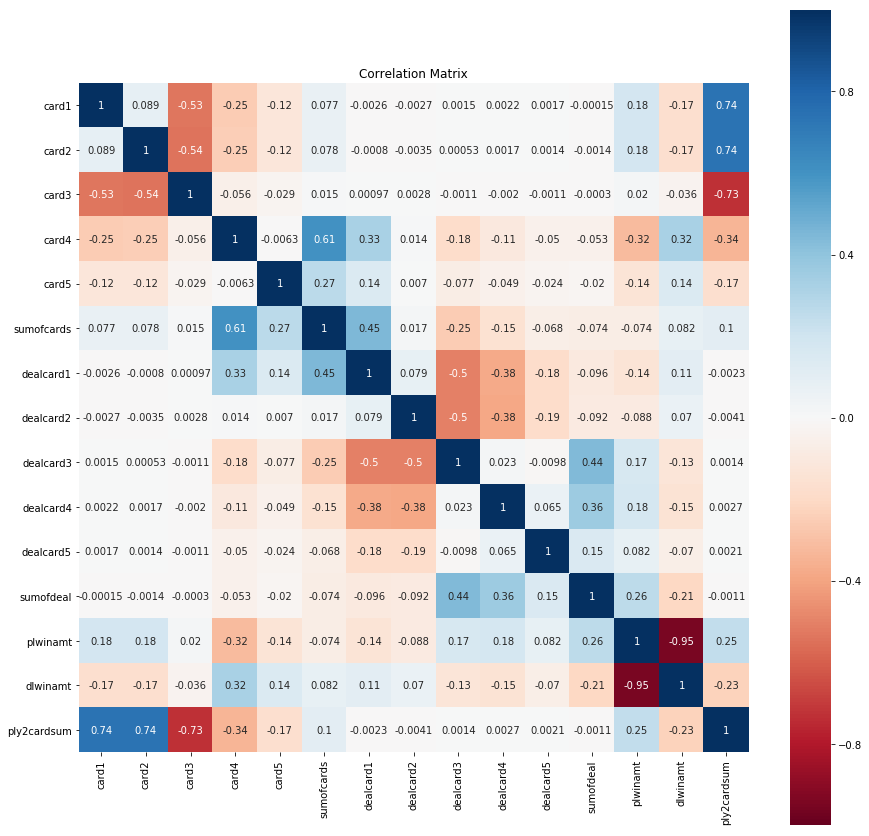

In [14]:
# plt.subplots(figsize=(10,7))
plt.subplots(figsize=(15,15))
corr_matrix = hands.corr()
corr = sns.heatmap(corr_matrix, square=True, annot=True, vmax=1.0, vmin=-1.0, cmap="RdBu").set_title('Correlation Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)


## <a name="data_visualization"></a>Data Visualization
In this section we will use matplotlib and seaborn packages to plot basic common plot while doing data analysis

Distribution plot for a numeric variable. 

Mean of card1 is 7.126258888888889
Median of card1 is 8.0
Mean of card2 is 7.089926666666667
Median of card2 is 8.0
Mean of card3 is 1.9550877777777778
Median of card3 is 0.0
Mean of card4 is 2.3364622222222224
Median of card4 is 0.0
Mean of card5 is 0.38978666666666667
Median of card5 is 0.0
Mean of sumofcards is 18.89752222222222
Median of sumofcards is 19.0
Mean of dealcard1 is 7.17038
Median of dealcard1 is 8.0
Mean of dealcard2 is 7.129866666666667
Median of dealcard2 is 8.0
Mean of dealcard3 is 4.3912933333333335
Median of dealcard3 is 4.0
Mean of dealcard4 is 1.3807333333333334
Median of dealcard4 is 0.0
Mean of dealcard5 is 0.22643333333333332
Median of dealcard5 is 0.0
Mean of sumofdeal is 20.298706666666668
Median of sumofdeal is 20.0
Mean of plwinamt is 9.723527777777777
Median of plwinamt is 10.0
Mean of dlwinamt is 4.775788888888889
Median of dlwinamt is 0.0
Mean of ply2cardsum is 14.216185555555555
Median of ply2cardsum is 14.0


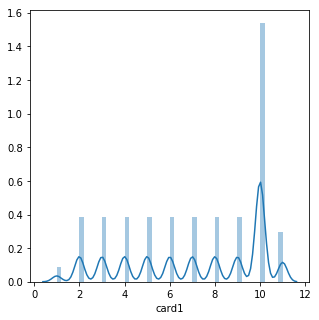

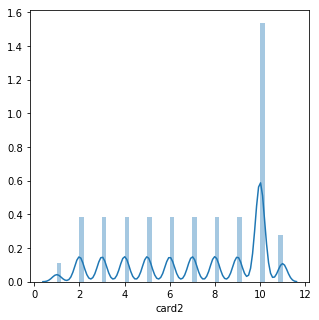

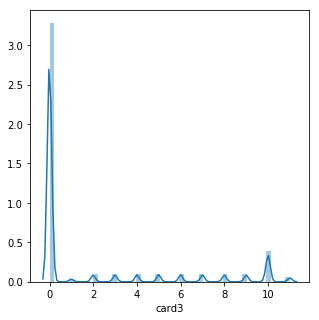

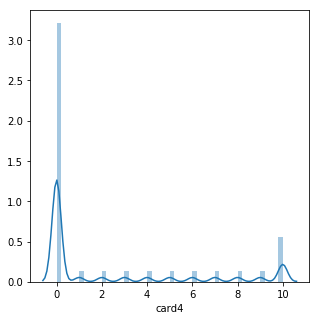

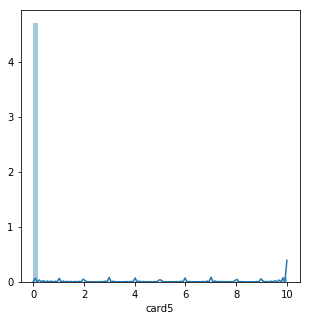

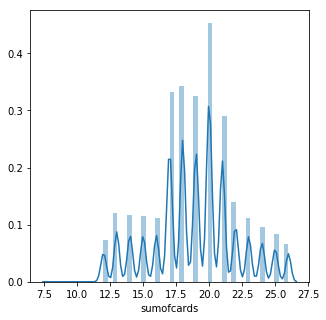

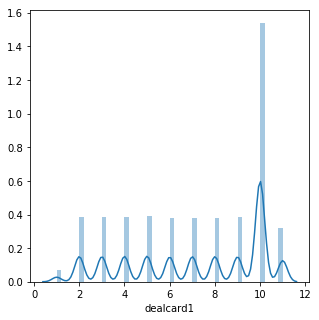

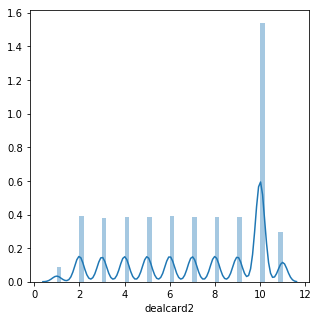

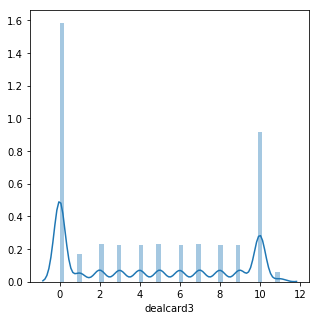

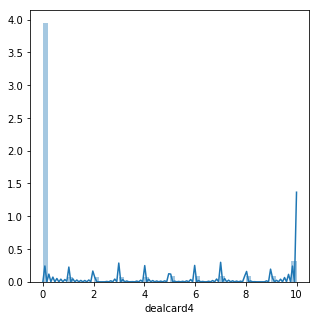

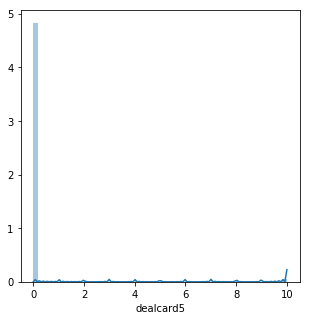

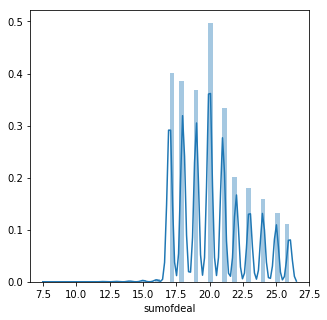

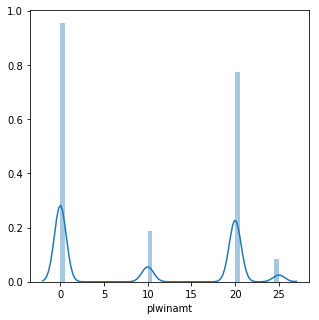

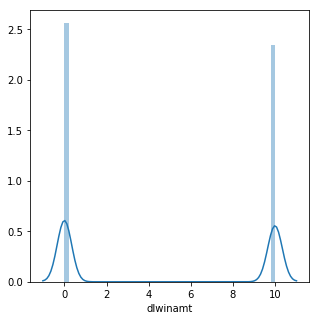

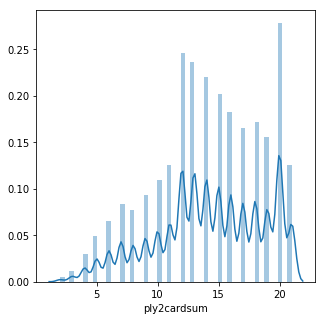

In [15]:
for numeric_feature in hands.select_dtypes(include=['int64']).columns:
    print(f"Mean of {numeric_feature} is {np.mean(hands[numeric_feature])}")
    print(f"Median of {numeric_feature} is {np.median(hands[numeric_feature])}")
    plt.subplots(figsize=(5, 5))
    sns.distplot(hands[numeric_feature], label=numeric_feature)

Distribution plot for a categorical variable

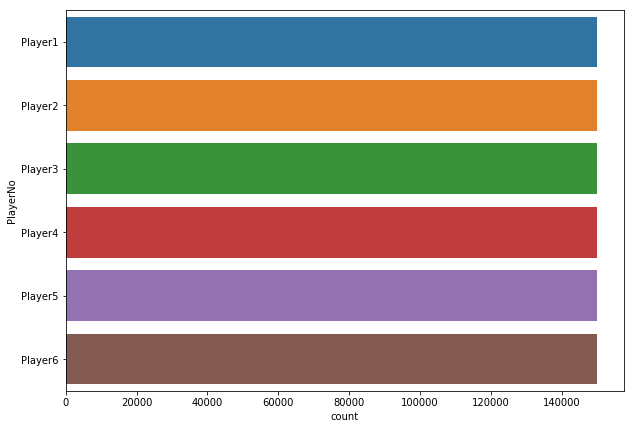

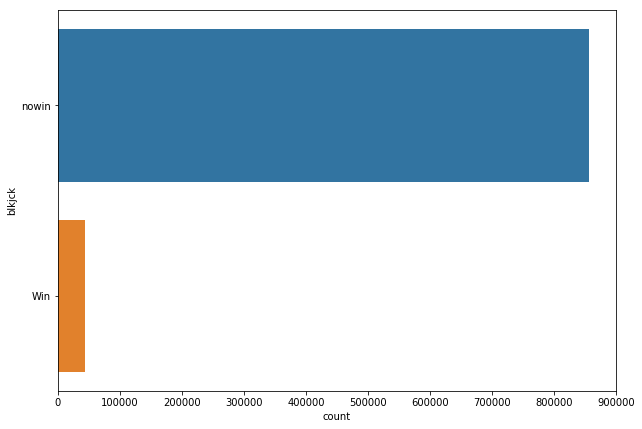

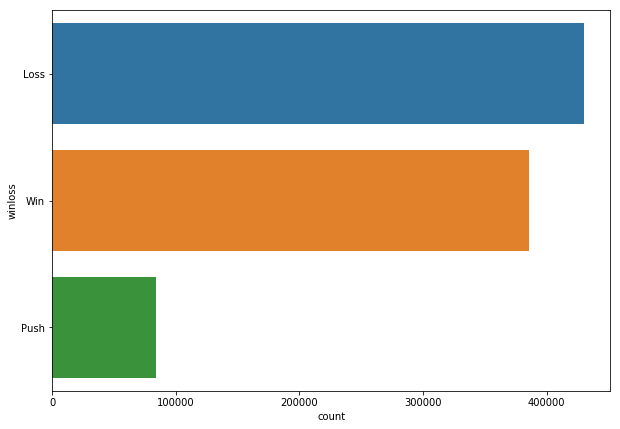

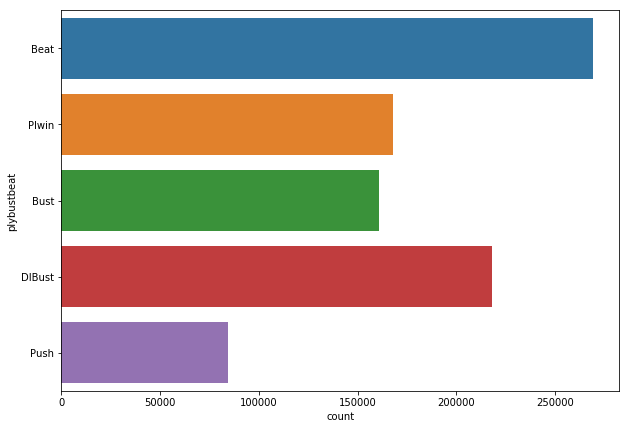

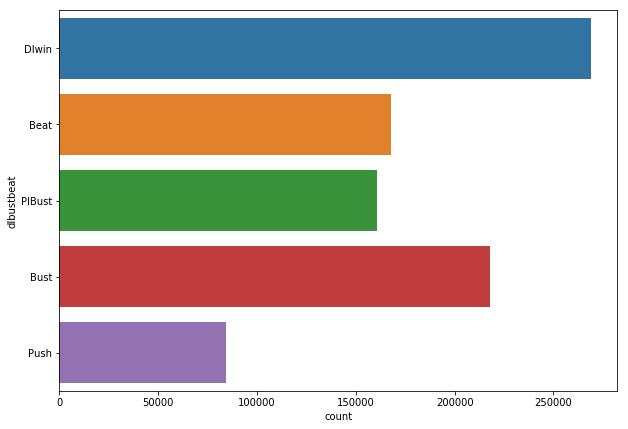

In [16]:
for object_feature in hands.select_dtypes(include='object').columns:
    plt.subplots(figsize=(10,7))
    sns.countplot(y = hands[object_feature])

Analyzing a numeric variable distrbution per a categorical variable values using boxplots.

C:\Users\aavivi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


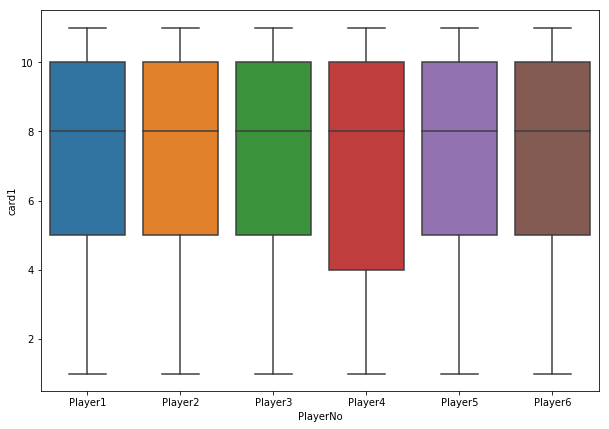

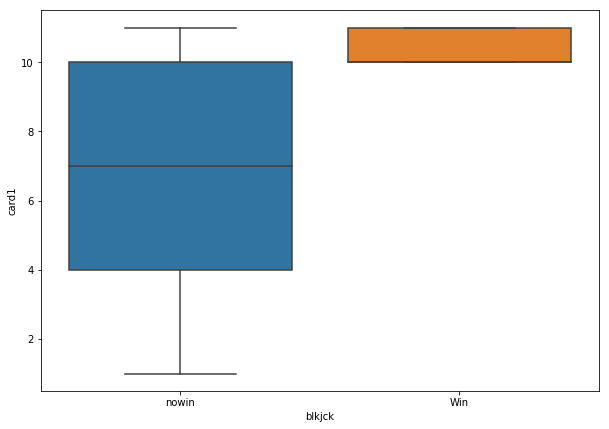

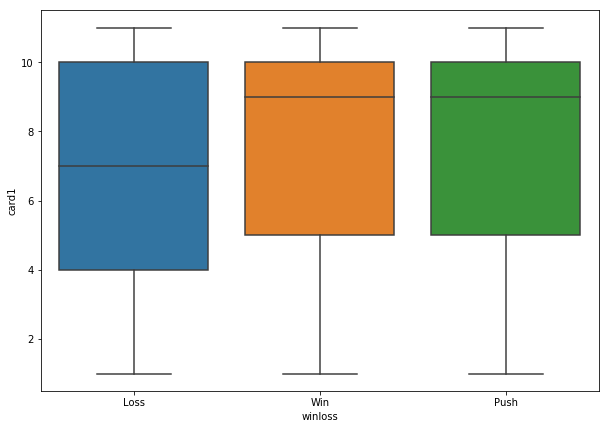

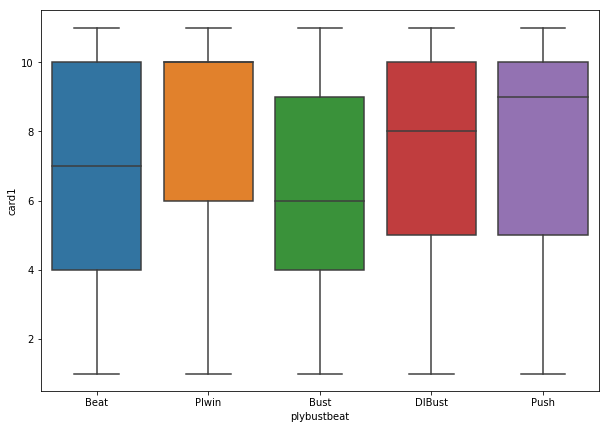

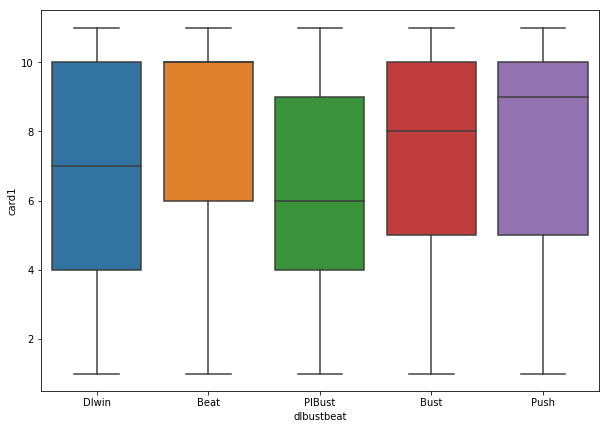

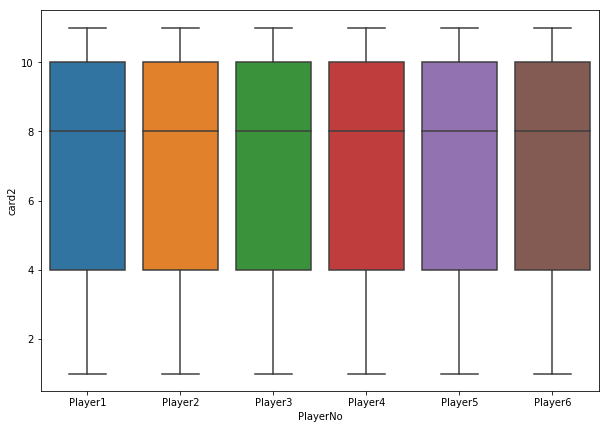

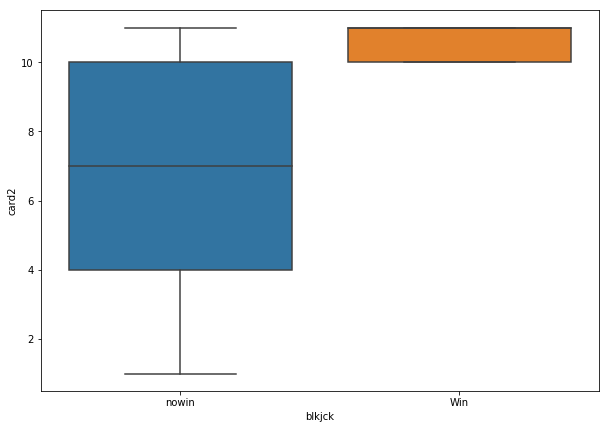

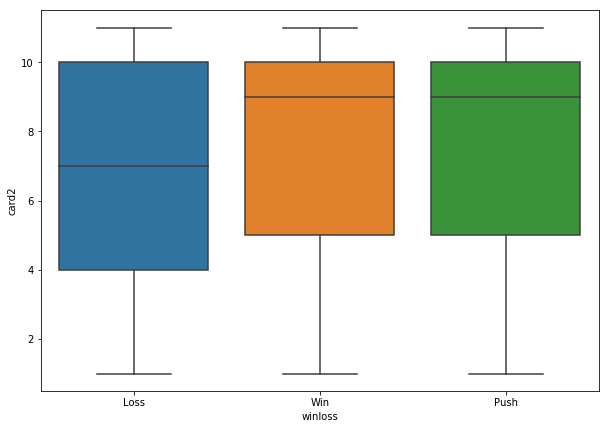

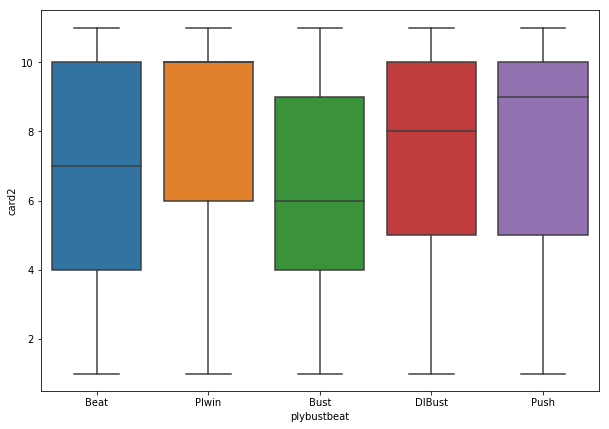

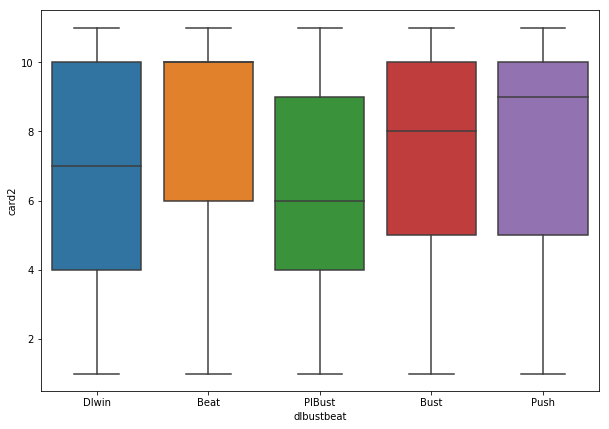

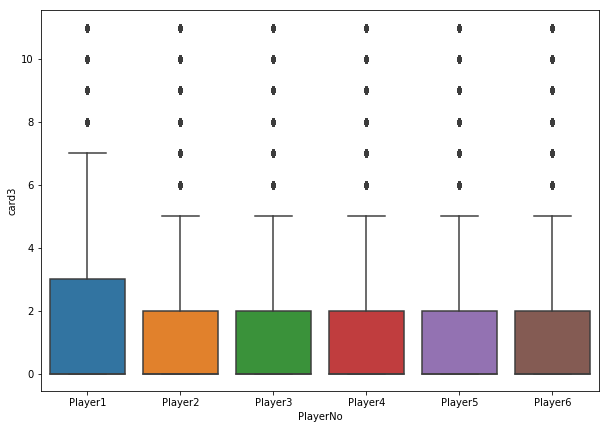

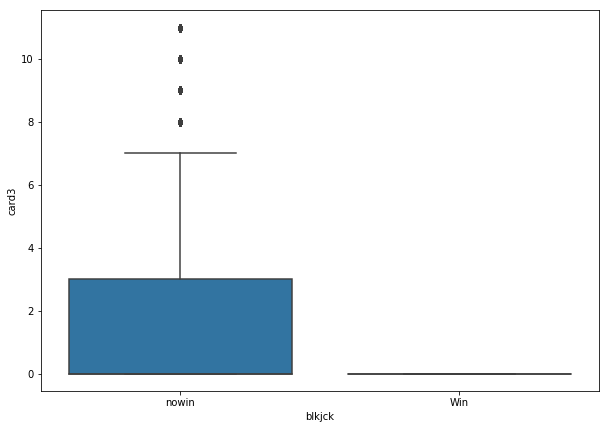

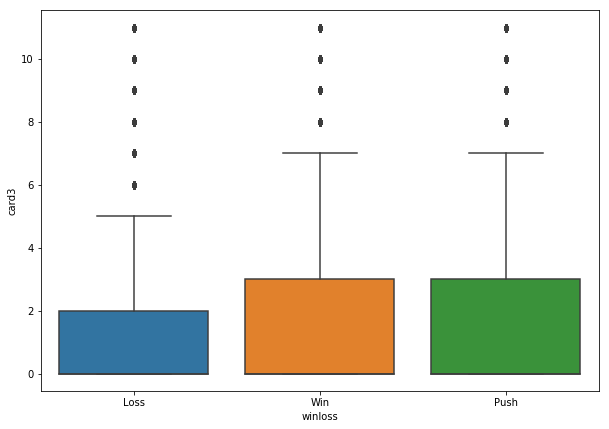

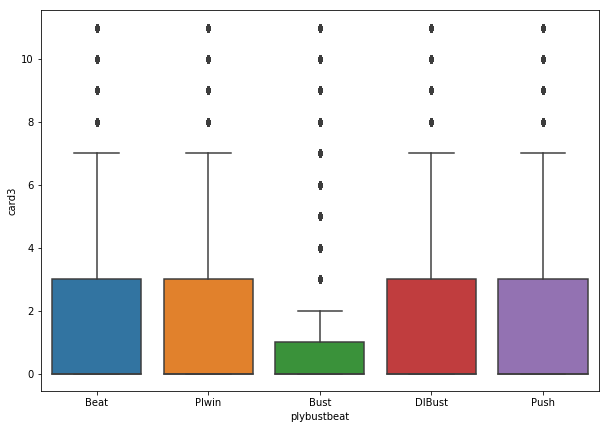

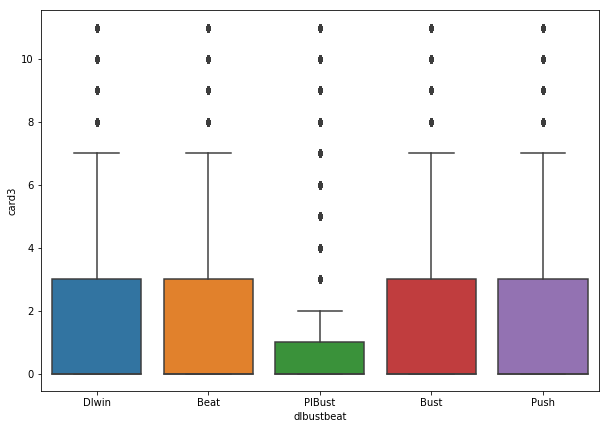

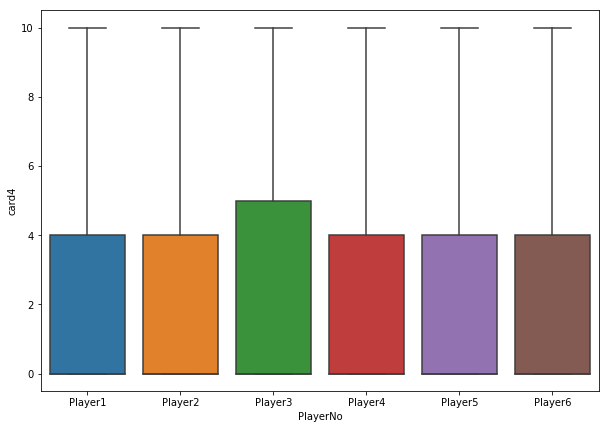

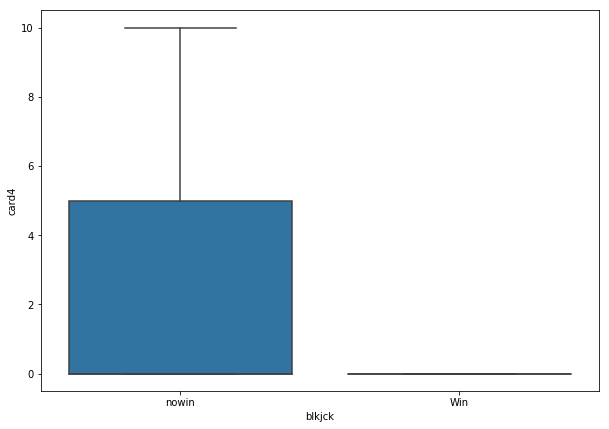

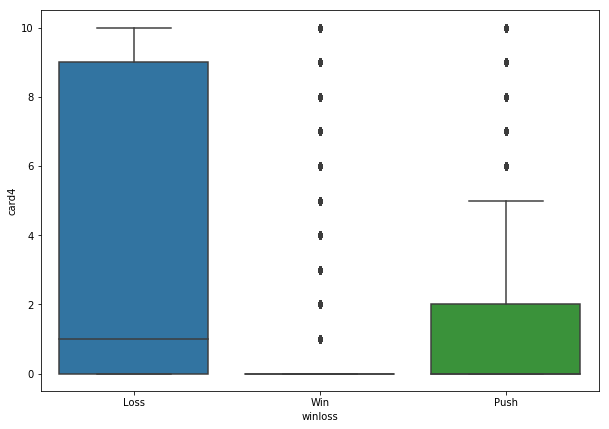

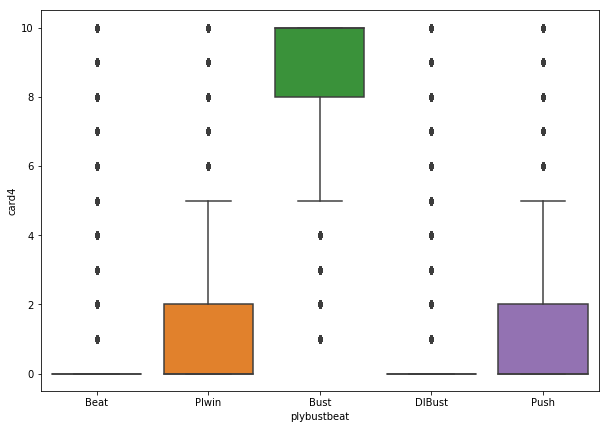

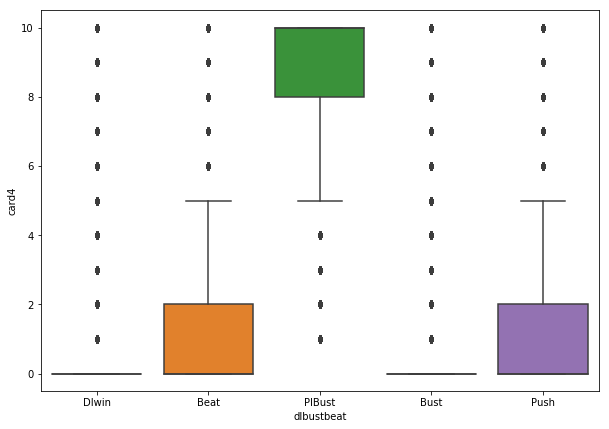

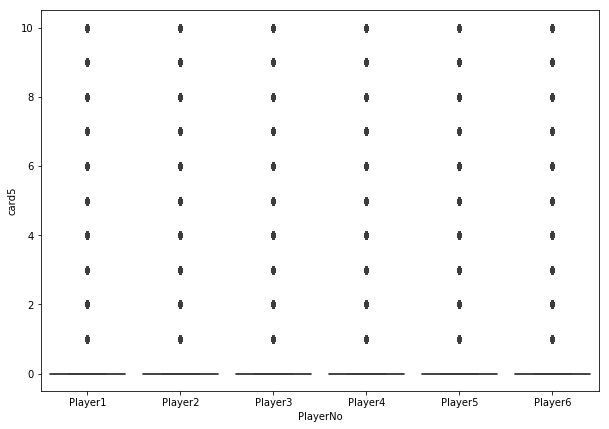

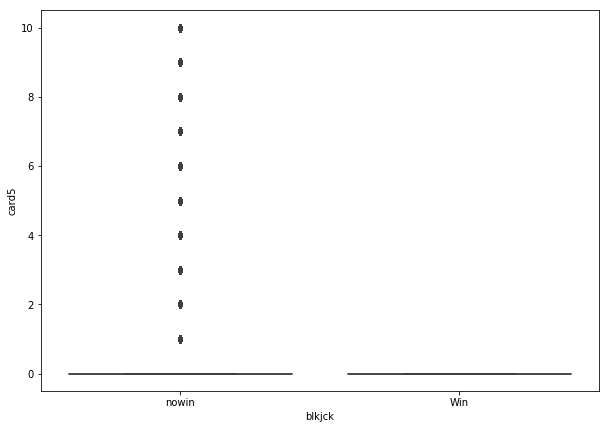

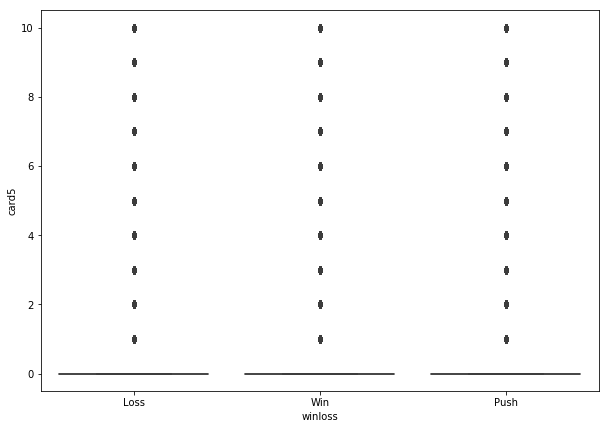

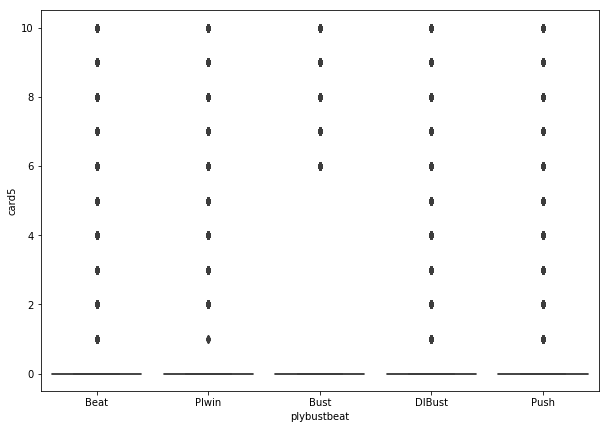

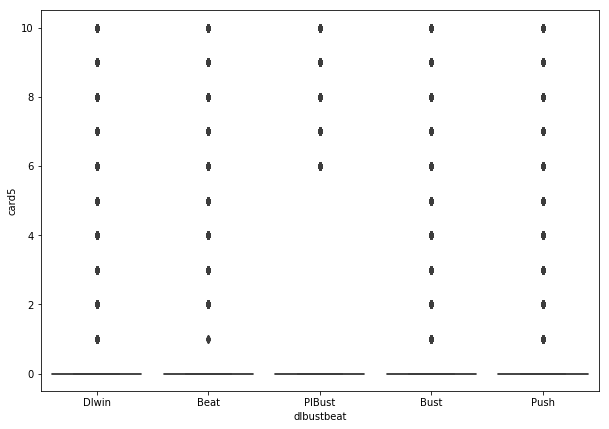

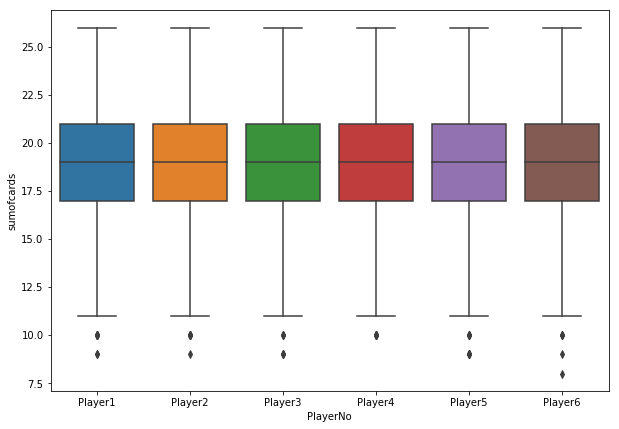

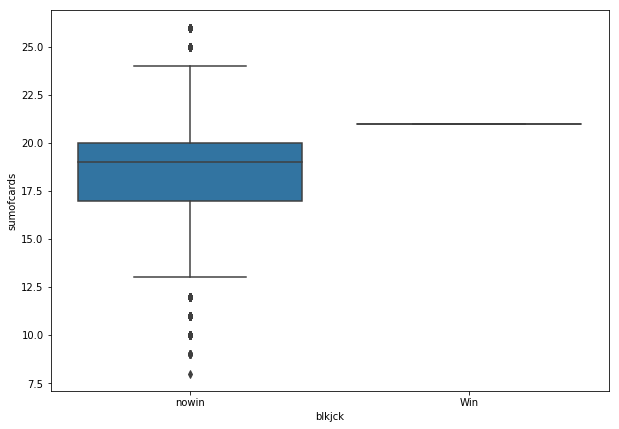

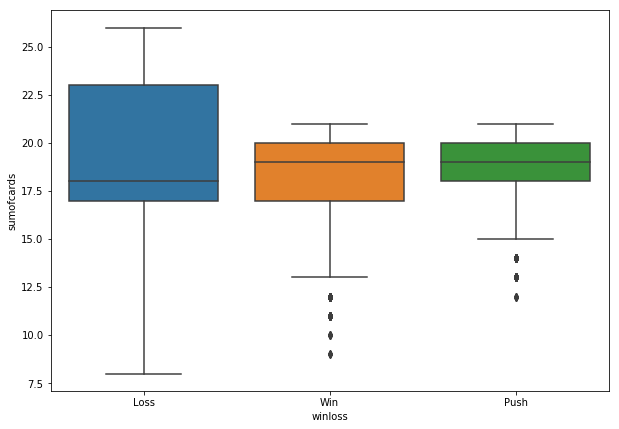

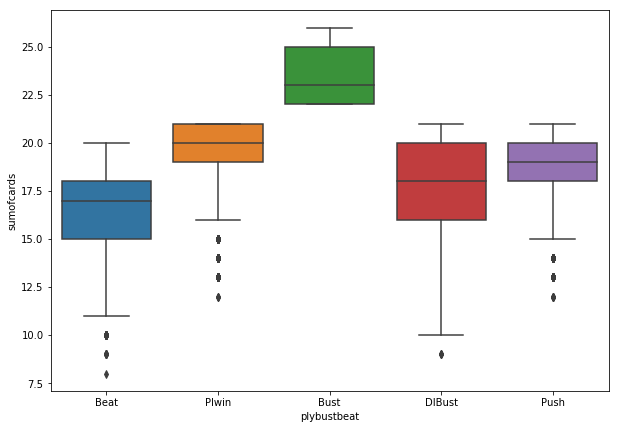

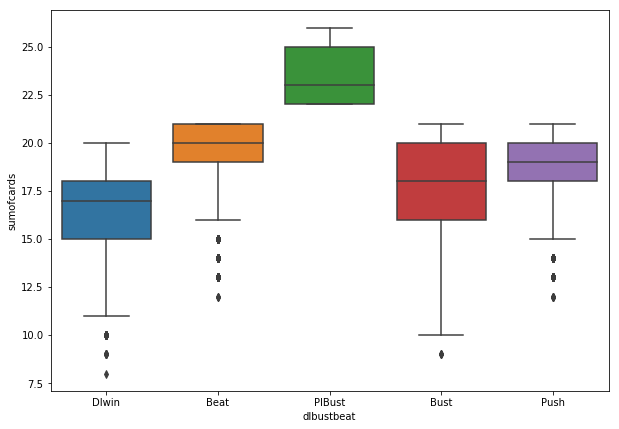

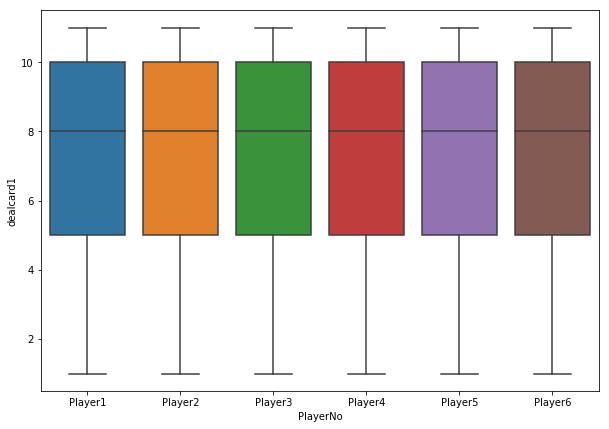

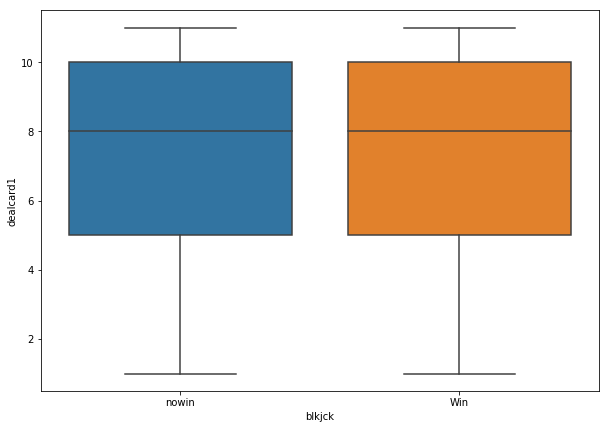

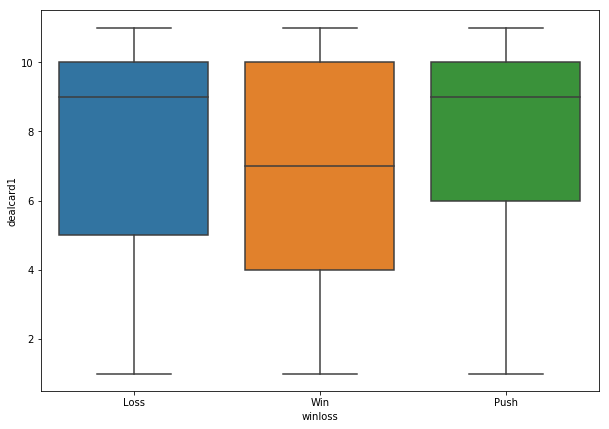

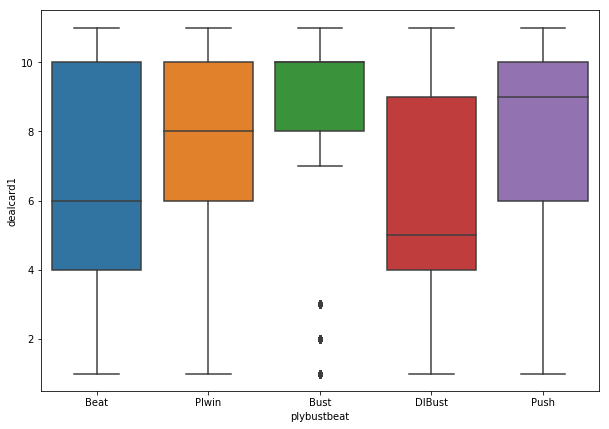

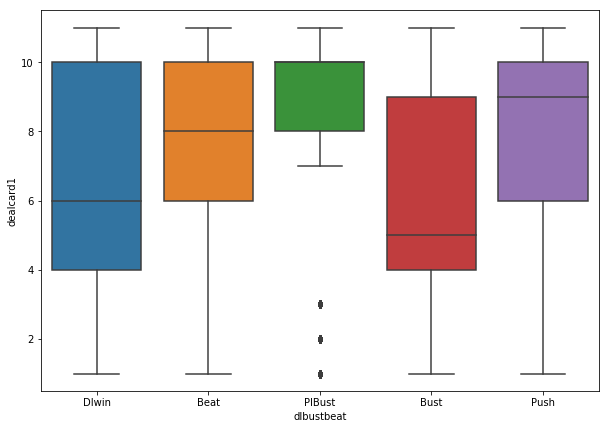

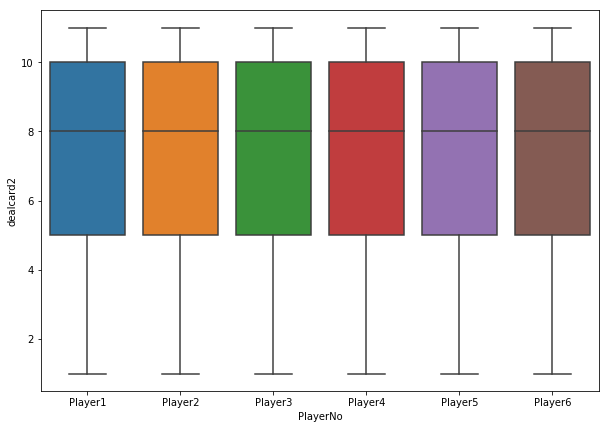

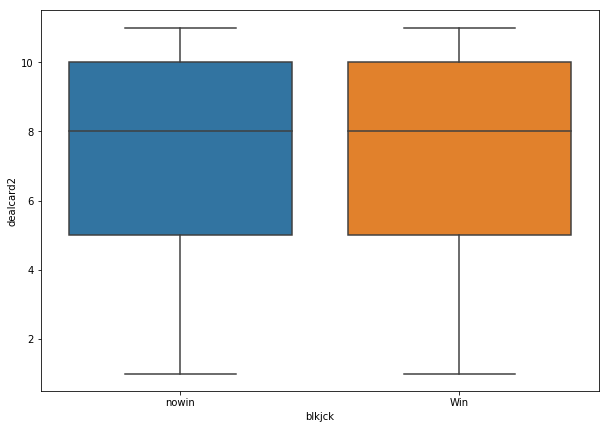

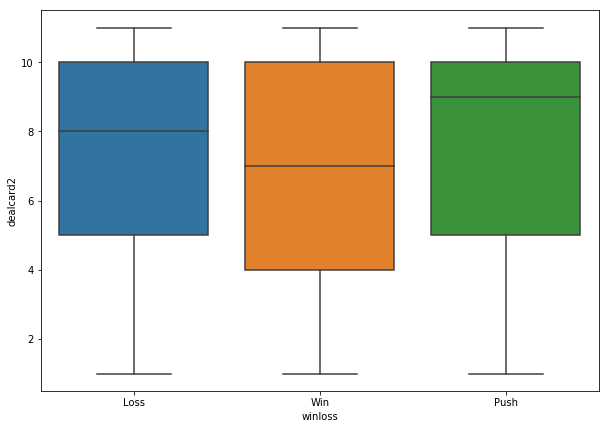

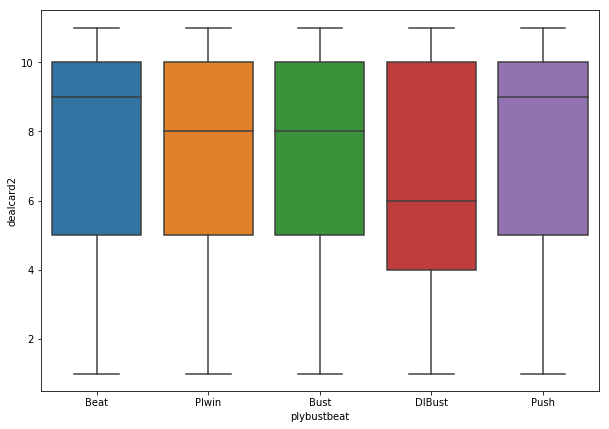

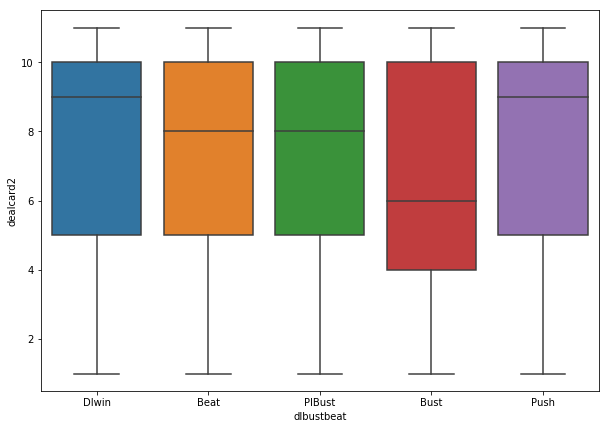

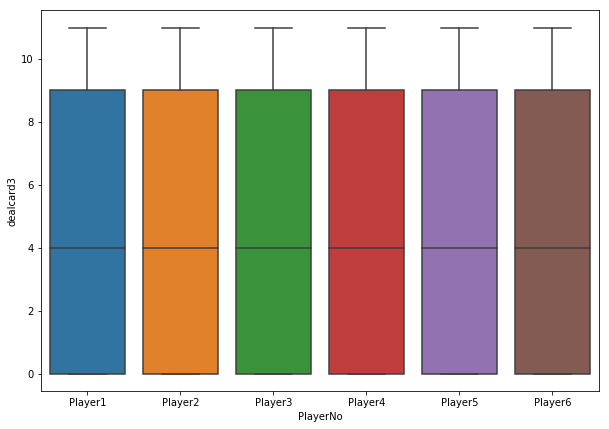

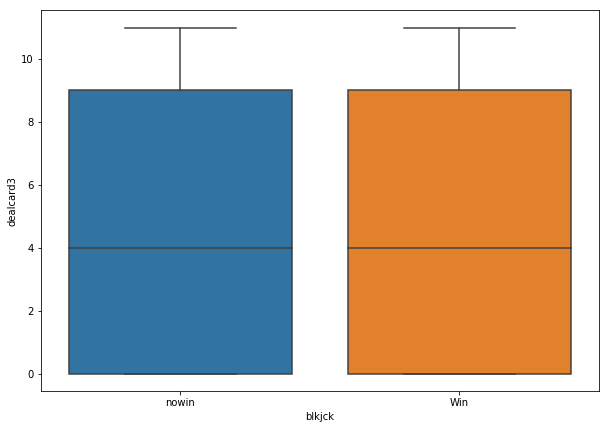

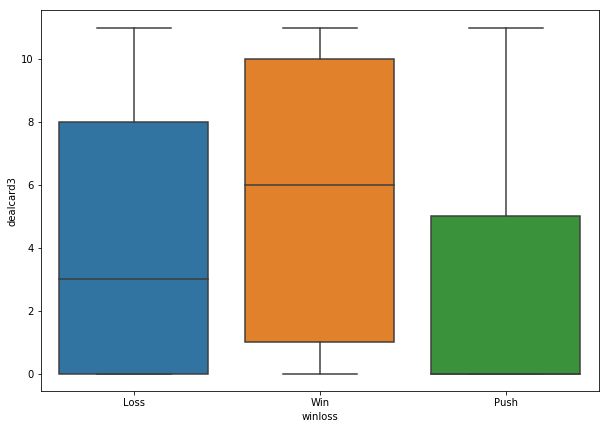

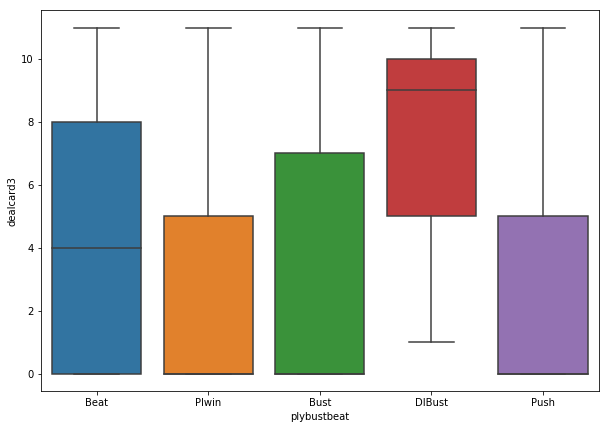

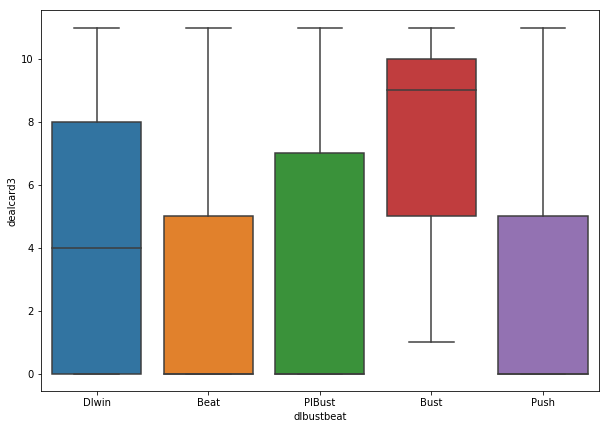

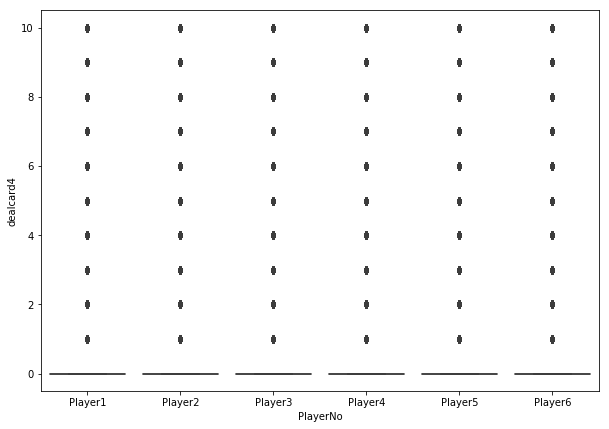

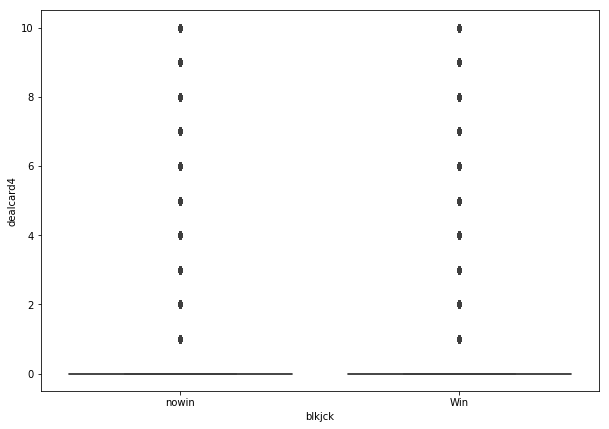

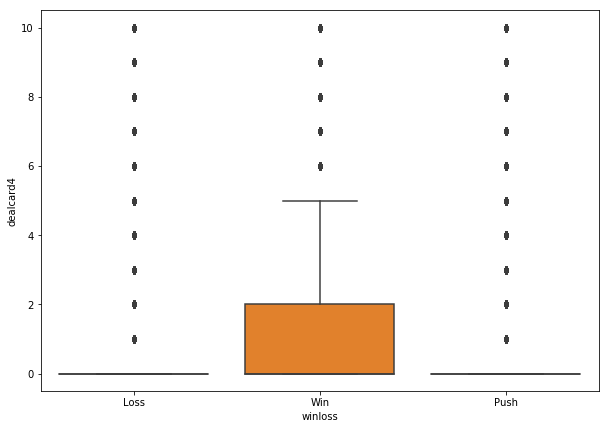

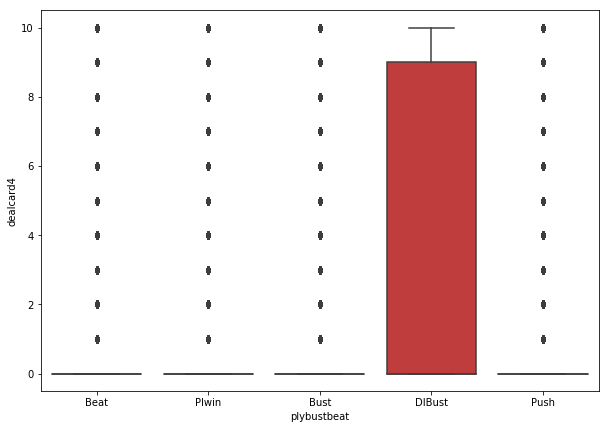

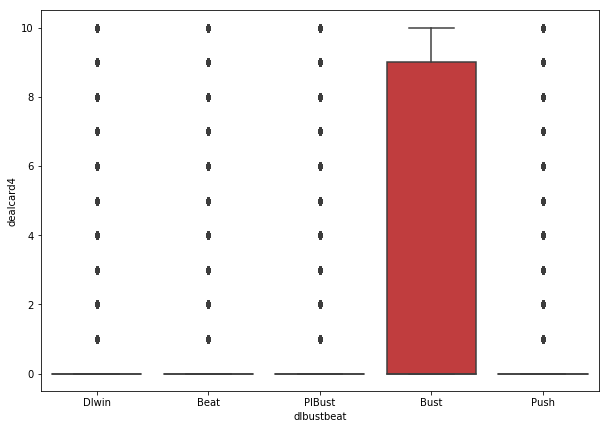

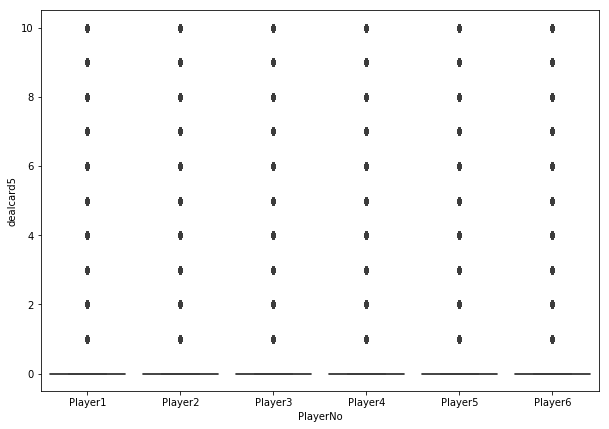

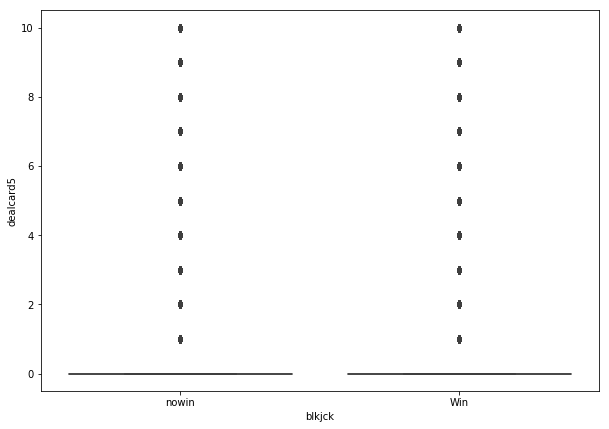

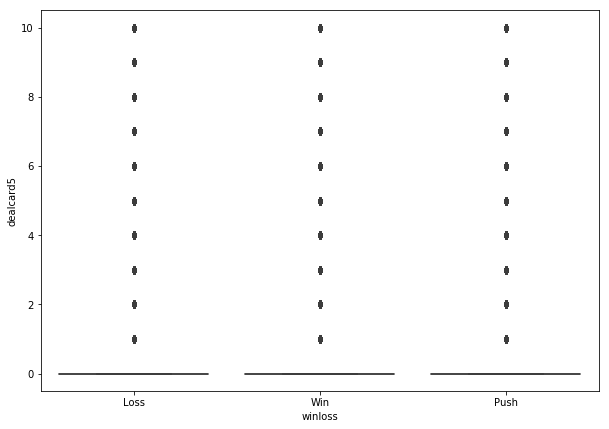

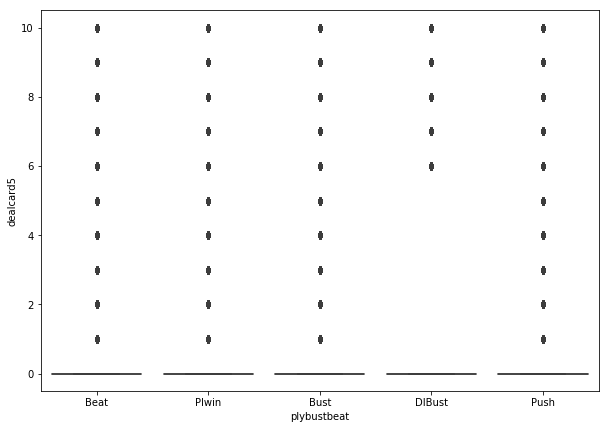

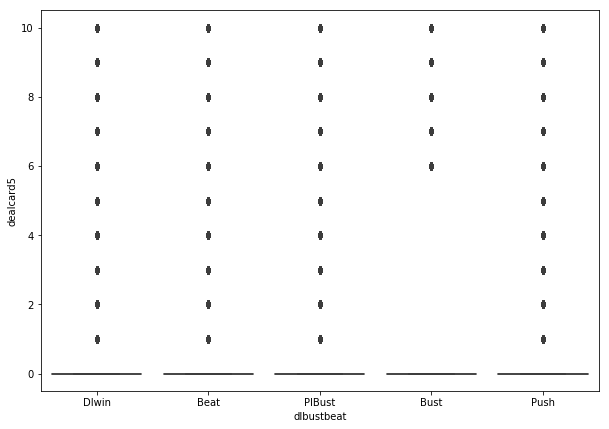

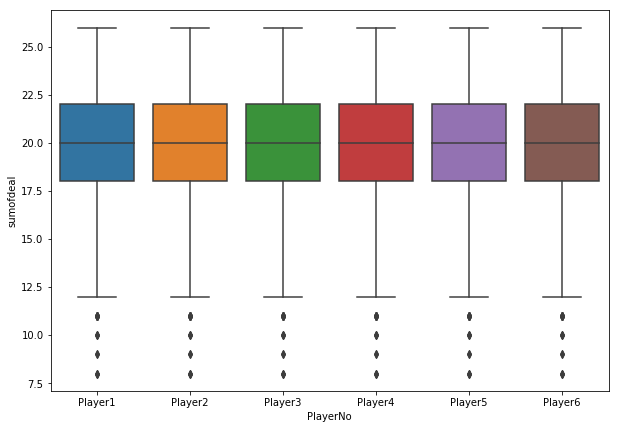

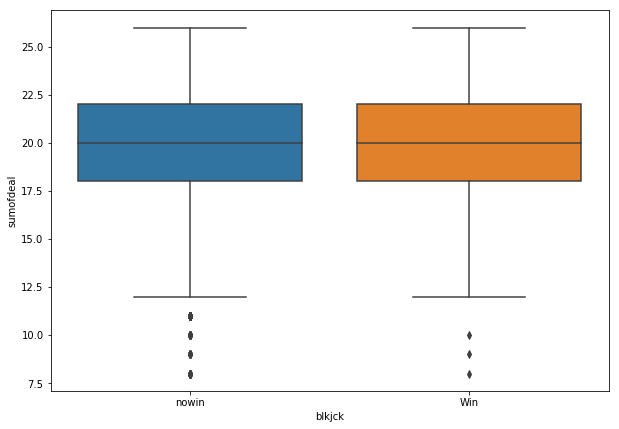

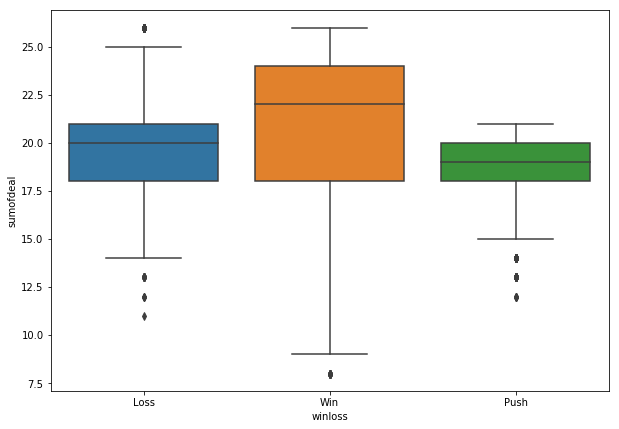

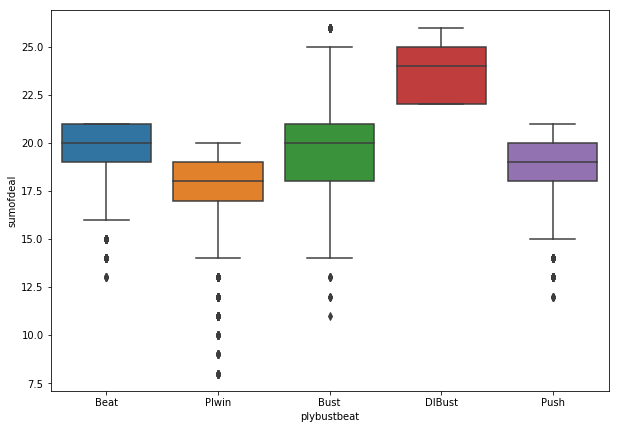

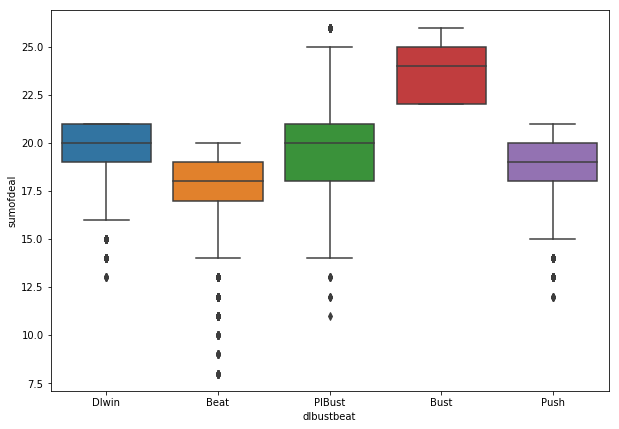

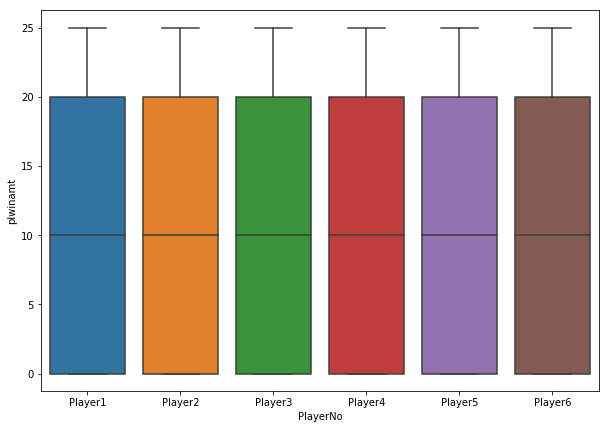

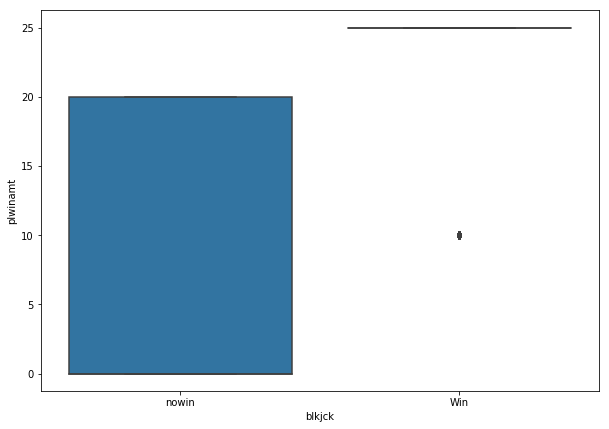

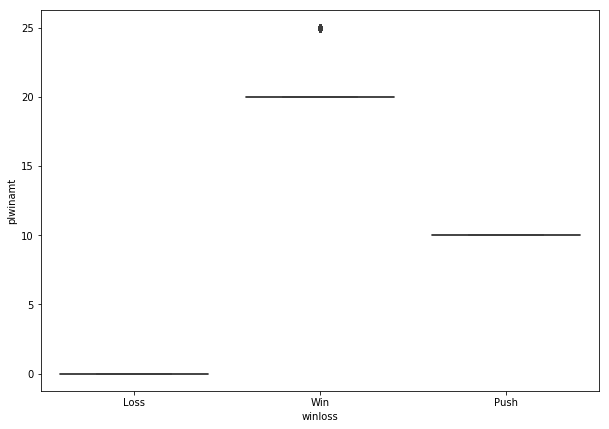

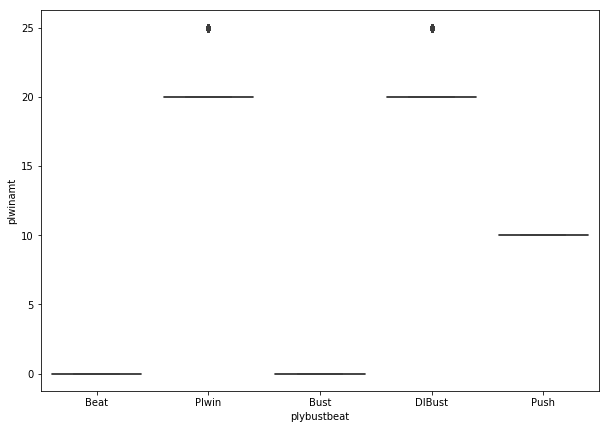

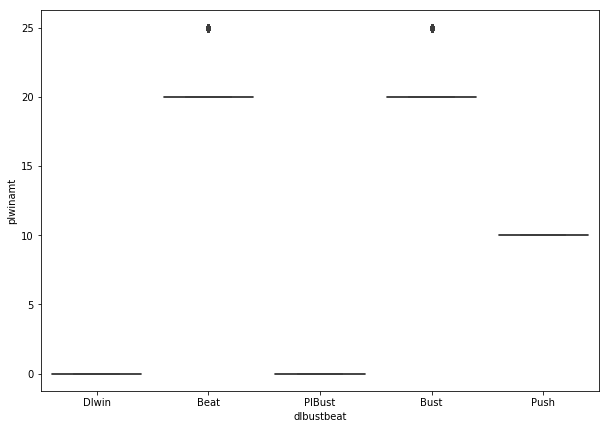

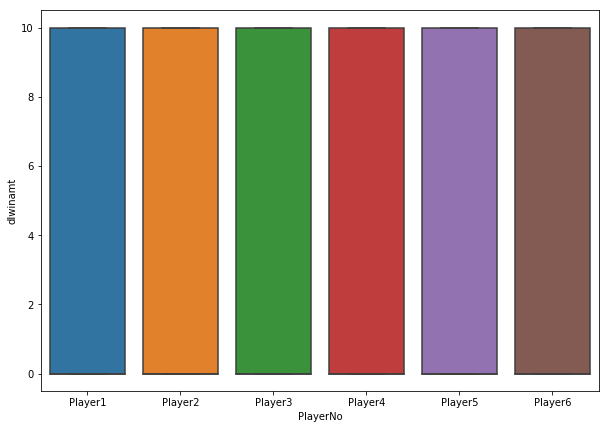

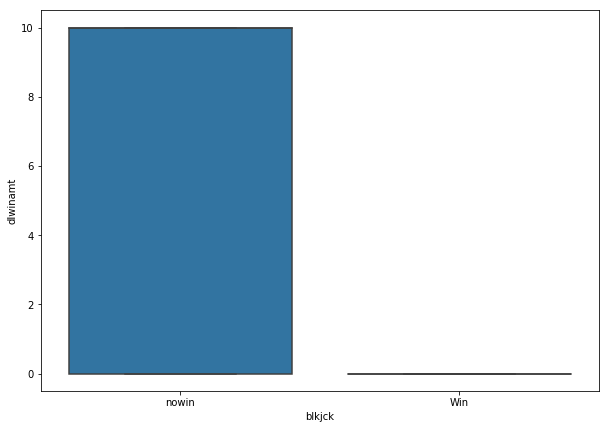

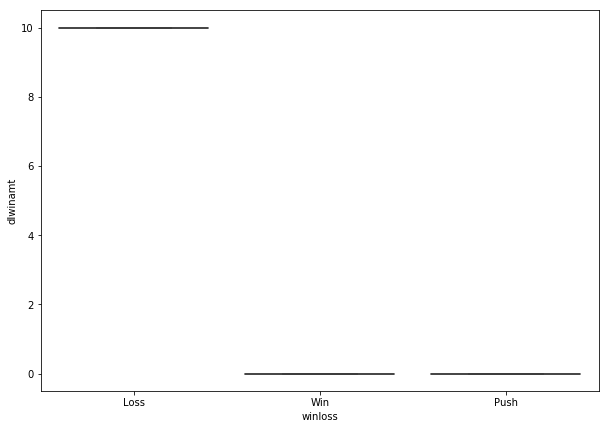

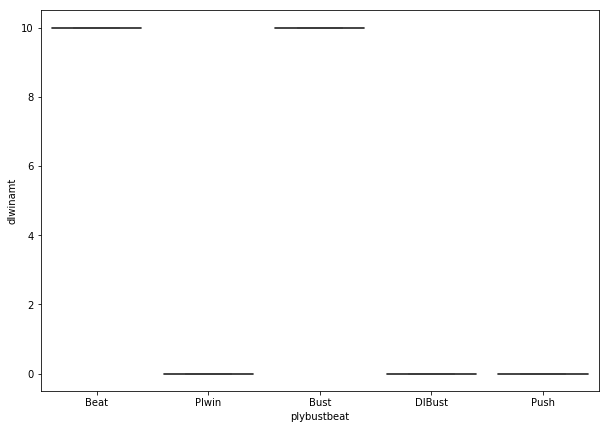

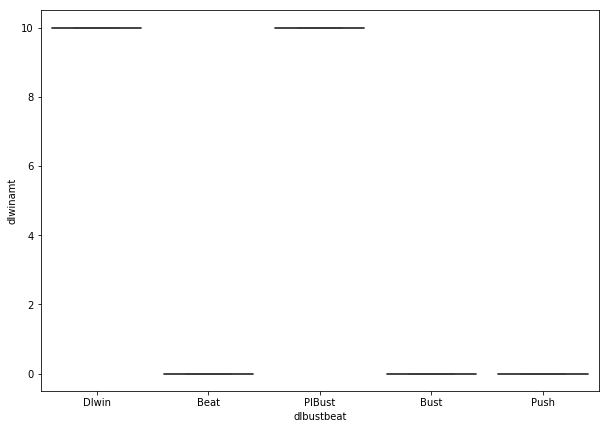

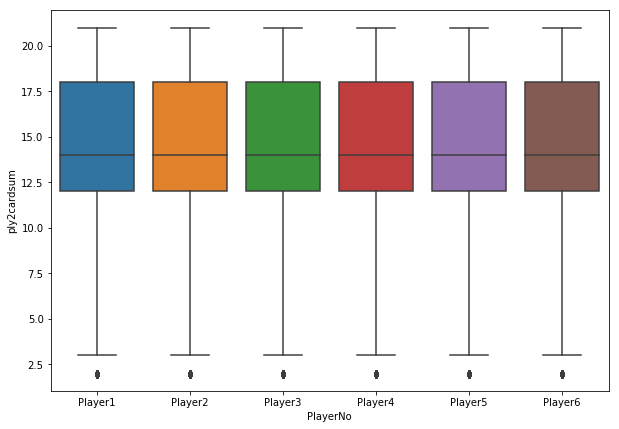

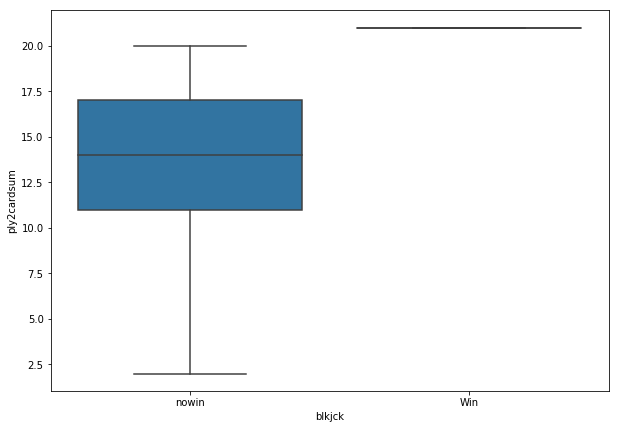

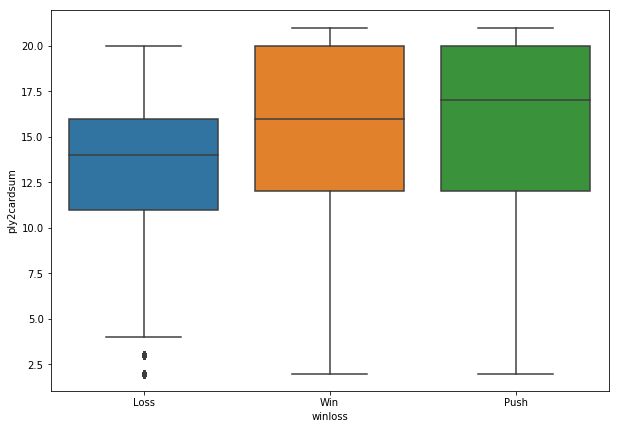

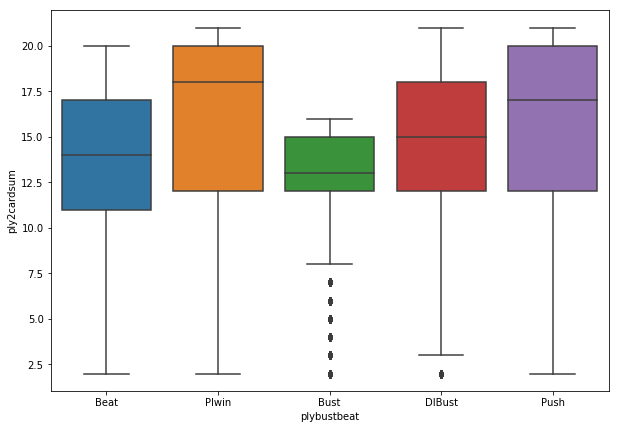

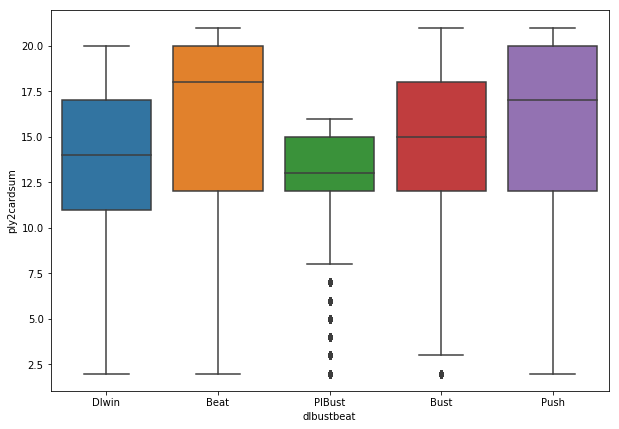

In [17]:
for r in itertools.product(hands.select_dtypes(include=['int64']).columns, hands.select_dtypes(include='object').columns):
    plt.subplots(figsize=(10,7))
    sns.boxplot(x=r[1], y=r[0], data=hands);

Analyzing a numeric variable distrbution per a categorical variable values using density plots.

In [18]:
# g=sns.FacetGrid(diamonds, col='cut')
# g.map(sns.distplot, "price")

In [19]:
# g=sns.FacetGrid(diamonds[(diamonds['carat'] < 0.8) & (diamonds['carat']>0.75)], col='cut')
# g.map(sns.distplot, "price")

In [20]:
# d = diamonds[(diamonds['carat'] < 0.8) & (diamonds['carat']>0.75)]
# d.shape

Analyzing two numeric variables. Plotting an advanced scatter plot

In [21]:
# sns.jointplot(x="x", y="price", data=diamonds)
# #sns.jointplot(x="x", y="price", data=diamonds, kind="kde")

Analyze automatically all numerical variables pairwaise combinations

In [22]:
# sns.pairplot(hands);